In [78]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns
import scipy.stats
from matplotlib import pyplot as plt
import math
import openpyxl
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import xlsxwriter
from sklearn import feature_selection
from scipy.stats import t

In [79]:
#Fundo a ser analisado
nome_da_base = 'Book1'#'book_pagaya_riverview'
col_fundos_input = ['JPEIGLSP Index','BRL Curncy','CAD Curncy','AUD Curncy']#['Pagaya Opportunity Fund','Riverview ALF']
nome_benchmark = 'DXY Index'#"IBOXHY Index"
diaria=0
tempo = 12 #252
const = 0.03
df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_da_base + '.csv',sep =';',index_col=0,decimal=',')

if diaria==1:
    df_diaria = pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_benchmark + '.csv',sep =';',index_col=0,decimal=',')
    df = pd.concat([df_diaria, df])


In [80]:
df.sort_values(by=["Product",'data'],ascending=True,inplace=True)

In [81]:
df

,data,Product,FinancialPrice,MesAno,Mes_nomial,Mes,Ano,Retorno_1,Retorno
484,2011-09-30,AUD Curncy,0.9662,09-2011,Sep,9,2011,1.089837,0.089836
485,2011-10-31,AUD Curncy,1.0530,10-2011,Oct,10,2011,0.976543,-0.023457
486,2011-11-30,AUD Curncy,1.0283,11-2011,Nov,11,2011,0.992804,-0.007196
487,2011-12-30,AUD Curncy,1.0209,12-2011,Dec,12,2011,1.040357,0.040357
488,2012-01-31,AUD Curncy,1.0621,01-2012,Jan,1,2012,1.010451,0.010451
...,...,...,...,...,...,...,...,...,...
237,2021-05-31,JPEIGLSP Index,306.6900,05-2021,May,5,2021,1.018944,0.018944
238,2021-06-30,JPEIGLSP Index,312.5000,06-2021,Jun,6,2021,1.040064,0.040064
239,2021-07-30,JPEIGLSP Index,325.0200,07-2021,Jul,7,2021,0.963048,-0.036951
240,2021-08-31,JPEIGLSP Index,313.0100,08-2021,Aug,8,2021,1.036293,0.036293


In [82]:
df_sub = df.pivot(index=["data","Ano","Mes"], columns="Product", values="Retorno_1")
df_sub = df_sub.reset_index()
df_sub = df_sub.dropna()

In [83]:
df_sub

Product,data,Ano,Mes,AUD Curncy,BRL Curncy,CAD Curncy,CRY Index,DXY Index,JPEIGLSP Index
0,2011-09-30,2011,9,1.089837,0.912946,0.952871,1.072749,0.969613,0.842503
1,2011-10-31,2011,10,0.976543,1.054089,1.016587,0.981178,1.029121,1.054936
2,2011-11-30,2011,11,0.992804,1.032237,1.003833,0.972851,1.022887,1.031676
3,2011-12-30,2011,12,1.040357,0.935719,0.981690,1.022961,0.988900,0.966904
4,2012-01-31,2012,1,1.010451,0.983169,0.987333,1.032404,0.993051,0.865463
...,...,...,...,...,...,...,...,...,...
115,2021-04-30,2021,4,1.002333,0.959729,0.981851,1.029741,0.984104,0.979934
116,2021-05-31,2021,5,0.969485,0.952080,1.027686,1.037368,1.029022,1.018944
117,2021-06-30,2021,6,0.979461,1.048803,1.006211,1.021991,0.997166,1.040064
118,2021-07-30,2021,7,0.996187,0.988429,1.011303,1.000404,1.004904,0.963048


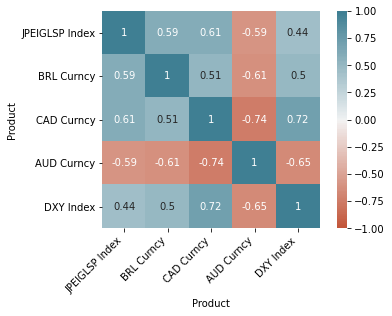

In [84]:
col_fundos1 =col_fundos_input
col_fundos1.append(nome_benchmark)

corr = df_sub[col_fundos_input].corr()

col_fundos1 =col_fundos_input
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('CorrelationMatrix.png',dpi=200)

In [174]:
x1 = 'DXY Index'
x2 = 'AUD Curncy'

In [175]:
coef_b=[]
coef_s=[]
coef_out_of_sample=[]
data=[]

janela_target=12

def func(df,k):
    n1=30
    df_rand = df[k:60+k].sample(n = n1)
    return scipy.stats.pearsonr(df_rand[x1], df_rand[x2])[0]
   
for k in range(0,len(df_sub[x1])-(61+janela_target)):
    
    #Correlacao Simples lag de 24  Meses passados
    coef_s.append(scipy.stats.pearsonr(df_sub[x1][k+36: k+(36+24)], df_sub[x2][k+36:k+60])[0])
    #Correlacao Futura de 12 Meses
    coef_out_of_sample.append(scipy.stats.pearsonr(df_sub[x1][k+61:k+61+janela_target], df_sub[x2][k+61:k+61+janela_target])[0])
    #Correlacao Bootstrap lag de 5 anos passados
    coef_b.append(np.mean([func(df_sub,k) for i in range(1000)]))
    data.append(df_sub['data'].iloc[60+k:61+k].values[0])
    
df_teste = pd.DataFrame(
    {'mes':data,
    'Correlacao_futura_out_of_sample': coef_out_of_sample,
     'Correlacao_BoostStrapping': coef_b,
     'Correlacao_simples_24_meses': coef_s,
     
    })
df_teste['Correlacao_BoostStrapping_erro'] = df_teste.Correlacao_futura_out_of_sample - df_teste.Correlacao_BoostStrapping
df_teste['Correlacao_Simples_24_meses_erro'] = df_teste.Correlacao_futura_out_of_sample - df_teste.Correlacao_simples_24_meses

In [176]:
df_teste

,mes,Correlacao_futura_out_of_sample,Correlacao_BoostStrapping,Correlacao_simples_24_meses,Correlacao_BoostStrapping_erro,Correlacao_Simples_24_meses_erro
0,2016-09-30,-0.690637,-0.660516,-0.722940,-0.030121,0.032303
1,2016-10-31,-0.590558,-0.619562,-0.712235,0.029004,0.121677
2,2016-11-30,-0.532785,-0.625496,-0.718649,0.092711,0.185864
3,2016-12-30,-0.513429,-0.630791,-0.707319,0.117362,0.193890
4,2017-01-31,-0.716448,-0.642599,-0.697818,-0.073849,-0.018630
5,2017-02-28,-0.714255,-0.628140,-0.683556,-0.086115,-0.030699
6,2017-03-31,-0.759490,-0.640178,-0.666048,-0.119312,-0.093442
7,2017-04-28,-0.726282,-0.625114,-0.599668,-0.101167,-0.126613
8,2017-05-31,-0.724260,-0.579893,-0.547650,-0.144367,-0.176610
9,2017-06-30,-0.626592,-0.575018,-0.559260,-0.051574,-0.067331


In [177]:
sum((df_teste.Correlacao_BoostStrapping_erro)**2) / len(df_teste.Correlacao_BoostStrapping_erro)


0.04651316007721588

In [178]:
sum((df_teste.Correlacao_Simples_24_meses_erro)**2) / len(df_teste.Correlacao_BoostStrapping_erro)

0.06483837100724772

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


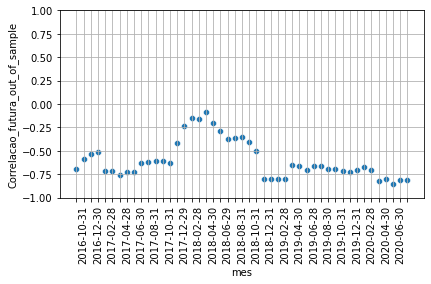

In [179]:
g =sns.scatterplot(df_teste.mes,df_teste.Correlacao_futura_out_of_sample)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid() 
g.set(ylim=(-1, 1))
for label in g.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

figure = g.get_figure()  
figure.savefig('0.png',dpi=200)

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


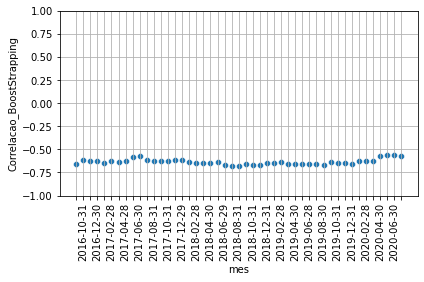

In [180]:
g =sns.scatterplot(df_teste.mes,df_teste.Correlacao_BoostStrapping)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid() 
g.set(ylim=(-1, 1))
for label in g.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
    
np.mean(df_teste.Correlacao_BoostStrapping)
figure = g.get_figure()  
figure.savefig('1.png',dpi=200)

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


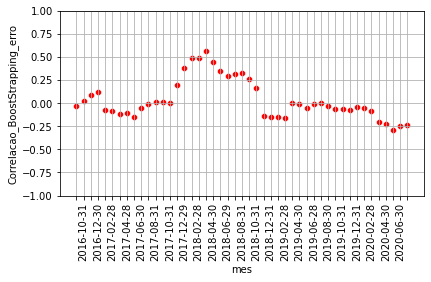

In [181]:
g =sns.scatterplot(df_teste.mes,df_teste.Correlacao_BoostStrapping_erro,color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid() 
g.set(ylim=(-1, 1))
for label in g.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
np.mean(df_teste.Correlacao_BoostStrapping)
figure = g.get_figure()  
figure.savefig('2.png',dpi=200)

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


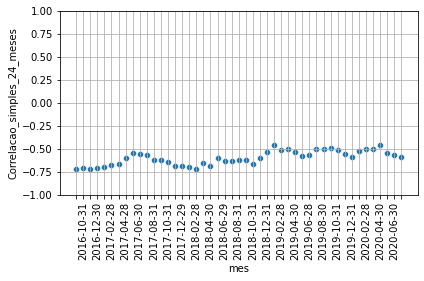

In [182]:
g =sns.scatterplot(df_teste.mes,df_teste.Correlacao_simples_24_meses)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid() 
g.set(ylim=(-1, 1))
for label in g.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
np.mean(df_teste.Correlacao_simples_24_meses)
figure = g.get_figure()  
figure.savefig('3.png',dpi=200)

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


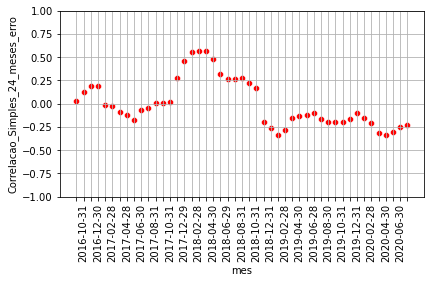

In [183]:
g =sns.scatterplot(df_teste.mes,df_teste.Correlacao_Simples_24_meses_erro,color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid() 
g.set(ylim=(-1, 1))
for label in g.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
np.mean(df_teste.Correlacao_BoostStrapping)
figure = g.get_figure()  
figure.savefig('4.png',dpi=200)

-0.5927315982019656 0.0858574669099989 (-0.7612132652673496, -0.42424993113658166)


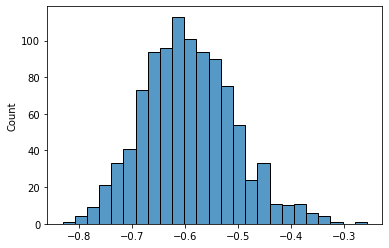

In [184]:

x= [func(df_sub,len(df_teste.Correlacao_BoostStrapping)) for i in range(1000)]
sns.histplot(x)
confidence_interval = scipy.stats.t.interval(0.95, 999, np.mean(x), np.std(x))
print(np.mean(x),np.std(x),confidence_interval)
plt.savefig('5.png')

<AxesSubplot:xlabel='Correlacao_simples_24_meses', ylabel='Count'>

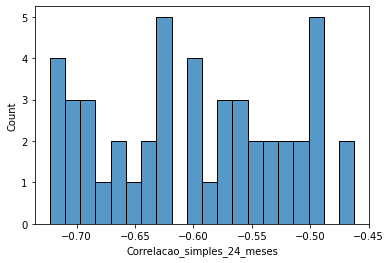

In [185]:
sns.histplot(df_teste.Correlacao_simples_24_meses,bins=20)

In [186]:
#Teste de hipotese
from scipy import stats
t,p1 = scipy.stats.ttest_ind(df_teste.Correlacao_BoostStrapping,df_teste.Correlacao_futura_out_of_sample ,equal_var = False)
if p1>0.05:
    r1 ='True'
else: r1 = 'False'

In [187]:
#Teste de hipotese
from scipy import stats
t,p2 = scipy.stats.ttest_ind(df_teste.Correlacao_simples_24_meses,df_teste.Correlacao_futura_out_of_sample ,equal_var = False)
if p2>0.05:
    r2 = 'True'
else: r2='False'

In [188]:
a=df_teste.Correlacao_futura_out_of_sample
b=df_teste.Correlacao_BoostStrapping
c=df_teste.Correlacao_simples_24_meses

v = np.array([[np.mean(a),np.std(a),np.NaN,np.NaN,np.NaN],[np.mean(b),np.std(b),np.mean(df_teste.Correlacao_BoostStrapping_erro**2),p1,r1],[np.mean(c),np.std(c),np.mean(df_teste.Correlacao_Simples_24_meses_erro**2),p2,r2]])




df_resultados = pd.DataFrame(v,index = ['Correlacao 12 meses futuros',"Correlacao BootStrapping","Correlacao 24 meses passados"],columns = ['Média','Desvio Padrao','Erro Quadratico Médio','P-valor: Teste de Hiposte Médias Iguais','Resultado Teste'])

In [189]:
df_resultados

,Média,Desvio Padrao,Erro Quadratico Médio,P-valor: Teste de Hiposte Médias Iguais,Resultado Teste
Correlacao 12 meses futuros,-0.5994242393193087,0.20190821757563612,nan,nan,nan
Correlacao BootStrapping,-0.6345061426963589,0.029580708468135437,0.04651316007721588,0.24938080792171655,True
Correlacao 24 meses passados,-0.5991123760953223,0.07639078840640791,0.06483837100724772,0.9922155408949273,True


In [190]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('teste_correlacao'+x1+x2+'.xlsx', engine='xlsxwriter')
workbook = writer.book
df_resultados.to_excel(writer,float_format = "%.2f", sheet_name='Graficos',startrow=2,startcol = 11)

worksheet = writer.sheets['Graficos'] 
for i in range(0,6):
    worksheet.insert_image('A'+ str(i*20+1), filename = str(i)+'.png')
workbook=writer.book


df_teste.to_excel(writer,float_format = "%.2f",sheet_name='DadosCorrelacao')
writer.save()